In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams


In [2]:
rcParams['font.family'] = 'sans-serif'
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'

In [3]:
usable_data = {
    'DSI': [[11.589850000000002, 11.480524999999998, 11.605599999999999, 11.422450000000001, 11.078074999999998],[0.7969073107867326, 0.7954829157969036, 0.7971114104798208, 0.7947207410729282, 0.7901203730195293],0.01,39.99],
    'AvgVAl': [[200.35625, 200.51300000000003, 194.24375, 206.88875, 207.21725000000004],[0.9168734937376295, 0.9168192248907981, 0.9190192224461049, 0.9146428147857585, 0.9145322851141118],1.1,537.2]
    
}

In [4]:
def w_a(threshold, x_0, x_a):
    ln_v = np.log(threshold)
    denm = np.log(1-np.abs((x_0-x_a)/(x_0+x_a)))
    return float(ln_v/denm)

def w_b(threshold, x_0, x_b):
    ln_v = np.log(threshold)
    denm = np.log(1-np.abs((x_b-x_0)/(x_b+x_0)))
    return float(ln_v/denm)

def wx(threshold, x_0, x_a, x_b):
    return np.sqrt(w_a(threshold, x_0, x_a) * w_b(threshold, x_0, x_b))

def index_val(avg_val, min_val, max_val, thresh, x0=50):
    weight = wx(thresh, x0, min_val, max_val)
    dsi = []
    for val in avg_val:
        dsi.append((1-np.abs((val-x0)/(val+x0)))**weight)
    return dsi

In [5]:
avg_val = usable_data["AvgVAl"][0]
dsi = usable_data["AvgVAl"][1]
dsi_working = index_val(avg_val, 1.1, 537.2, 0.8, x0=220)
lin_val = [5,5,5,5,5]
si_lin_val = index_val(avg_val, 5, 5, 0, x0=5)

/home/jarwin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/jarwin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [6]:
lin_val

[5, 5, 5, 5, 5]

In [7]:
si_lin_val

[0.0, 0.0, 0.0, 0.0, 0.0]

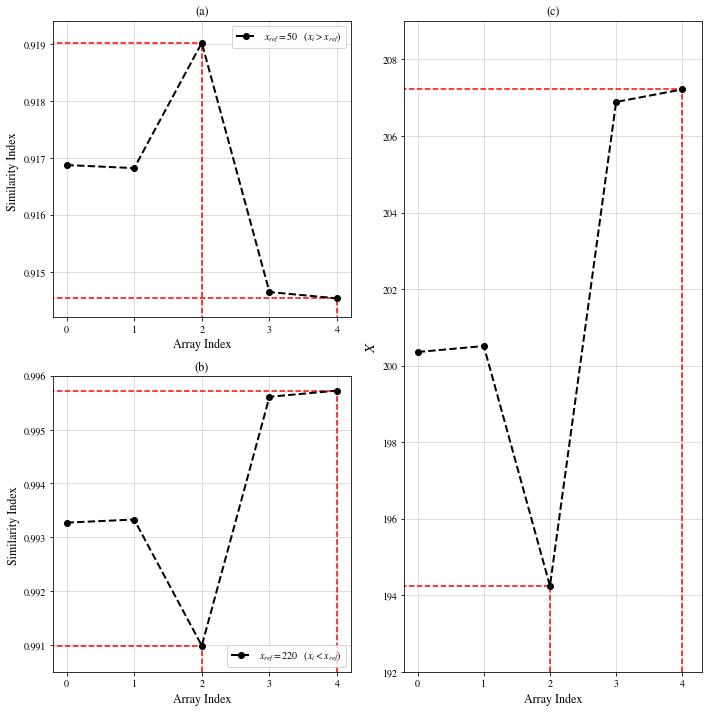

In [8]:
x = range(0,len(avg_val))
plt.style.use("seaborn-dark-palette")

# plt.style.use("seaborn-dark-palette")

plt.figure(figsize=(10,10))

'''plt.subplot(2,2,1)
plt.xticks([0,1,2,3,4])
plt.plot(x, avg_val, 'o-', color="black", linewidth=2)
plt.xlabel("Array Index", weight="normal", size="large")
plt.ylabel("$X$", weight="normal", size="x-large")
plt.grid(True, alpha=0.5)
'''
plt.subplot(2,2,1)
plt.plot(x, dsi, 'o--', color="black", linewidth=2, label='$x_{ref} = 50\quad(x_i > x_{ref})$')
plt.grid(True, alpha=0.5)
plt.xticks([0,1,2,3,4])
plt.legend(loc="upper right")
plt.hlines([dsi[2], dsi[4]],-0.5,[2,4], linestyle="dashed", color="r")
plt.vlines([2,4], 0.9105, [dsi[2], dsi[4]], linestyle="dashed", color="r")
plt.xlabel("Array Index", weight="normal", size="large")
plt.ylabel("Similarity Index ", weight="normal", size="large")
plt.title("(a)")
#plt.ylim((0.8515,0.8565))
plt.ylim((0.9142,0.9194))
plt.xlim(-0.2, 4.2)


plt.subplot(2,2,3)
plt.plot(x, dsi_working, 'o--', color="black", linewidth=2, label='$x_{ref} = 220 \quad (x_i < x_{ref})$')
plt.grid(True, alpha=0.5)
plt.xticks([0,1,2,3,4])
plt.legend(loc="lower right")
#plt.ylim((0.8515,0.8565))
#plt.ylim((0.7,0.8))
plt.xlabel("Array Index", weight="normal", size="large")
plt.ylabel("Similarity Index ", weight="normal", size="large")
plt.hlines([dsi_working[2], dsi_working[4]],-0.5,[2,4], linestyle="dashed", color="r")
plt.vlines([2,4], 0.9905, [dsi_working[2], dsi_working[4]], linestyle="dashed", color="r")
plt.ylim((0.9905, 0.996))
plt.xlim(-0.2, 4.2)
plt.title("(b)")


plt.subplot(2,2,(2,4))
plt.xticks([0,1,2,3,4])
plt.plot(x, avg_val, 'o--', color="black", linewidth=2)
plt.xlabel("Array Index", weight="normal", size="large")
plt.ylabel("$X$", weight="normal", size="x-large")
plt.grid(True, alpha=0.5)
plt.hlines([avg_val[2], avg_val[4]],-0.5,[2,4], linestyle="dashed", color="r")
plt.vlines([2,4], 192, [avg_val[2], avg_val[4]], linestyle="dashed", color="r")
plt.title("(c)")
plt.xlim((-0.2,4.3))
plt.ylim((192,209))

plt.savefig("comparision.png", dpi=300)
plt.tight_layout()

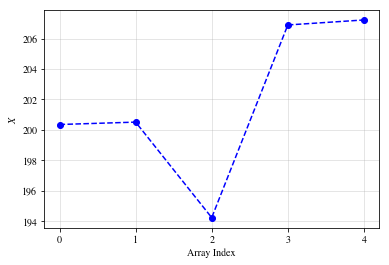

In [9]:
plt.style.use("seaborn-dark-palette")
plt.plot(x,avg_val, 'o--', color='b')
plt.xticks(range(0,5))
plt.grid(True, alpha=0.4)
plt.xlabel("Array Index")
plt.ylabel("$X$")
plt.savefig("DataPoint.png", dpi=300)

In [7]:
avg_val

[200.35625, 200.51300000000003, 194.24375, 206.88875, 207.21725000000004]

In [8]:
dsi_working

[0.9932721213270813,
 0.9933294570477575,
 0.9909861095346113,
 0.9956094794839897,
 0.9957242669357483]

# $x_{ref}$ Variations

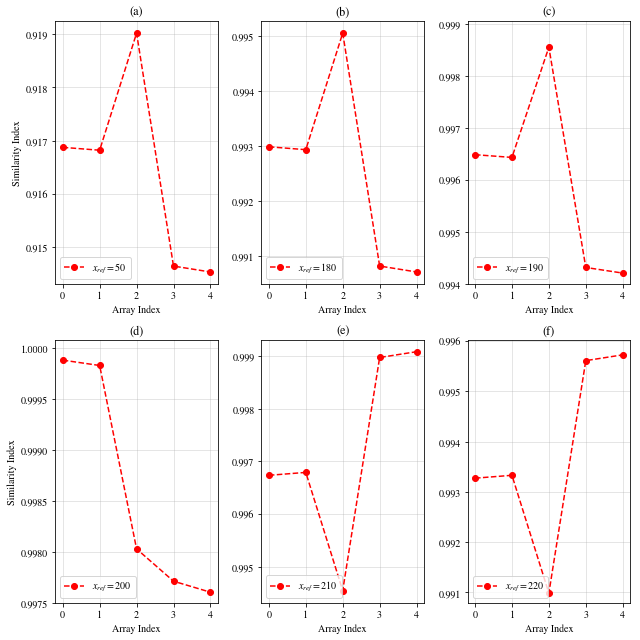

In [37]:
plt.style.use("seaborn-dark-palette")

rcParams['font.family'] = 'sans-serif'
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
#plt.figure(figsize=(9,9))
f = plt.figure(figsize=(10,10))
f.set_figheight(9)
f.set_figwidth(9)


plt.subplot(2,3,1)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.8, x0=50), 'o--', color='r', label="$x_{ref} = 50$")
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.ylabel("Similarity Index")
plt.title("(a)")

plt.subplot(2,3,2)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.8, x0=180), 'o--', color='r',label = "$x_{ref} = 180$")
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.title("(b)")

plt.subplot(2,3,3)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.8, x0=190), 'o--', color='r', label="$x_{ref} = 190$")
plt.ylim(plt.ylim((0.994, max(index_val(avg_val, 1.1, 537.2, 0.8, x0=190))+0.0005)))
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.title("(c)")

plt.subplot(2,3,4)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.8, x0=200), 'o--', color='r', label="$x_{ref} = 200$")
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
mval = max(index_val(avg_val, 1.1, 537.2, 0.8, x0=200))+0.0002
plt.ylim((0.9975, mval))
plt.ylabel("Similarity Index")
plt.title("(d)")

plt.subplot(2,3,5)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.8, x0=210), 'o--', color='r', label="$x_{ref} = 210$")
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.title("(e)")

plt.subplot(2,3,6)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.8, x0=220), 'o--', color='r', label="$x_{ref} = 220$")
plt.grid(True, alpha=0.4)
plt.ylim((0.9908, max(index_val(avg_val, 1.1, 537.2, 0.8, x0=220))+0.0003))
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.title("(f)")

plt.tight_layout()
plt.savefig("Varaition_x0.png", dpi=300)

## Vairations in Threshhold

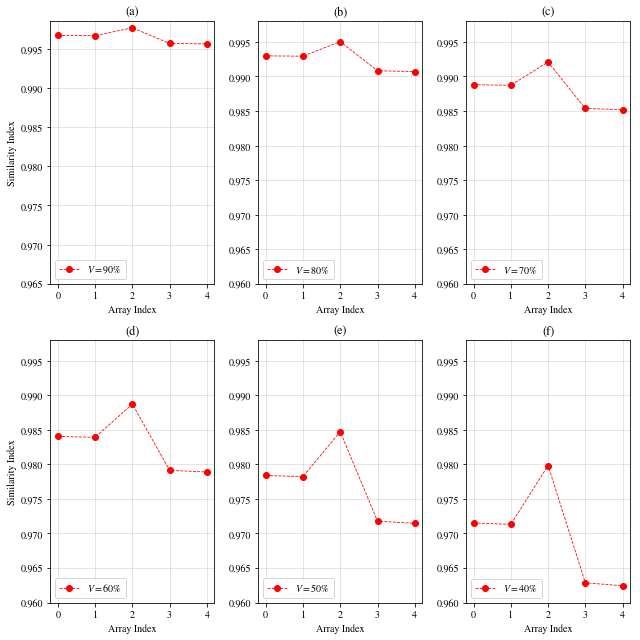

In [55]:
plt.style.use("seaborn-dark-palette")

rcParams['font.family'] = 'sans-serif'
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
#plt.figure(figsize=(9,9))
f = plt.figure(figsize=(10,10))
f.set_figheight(9)
f.set_figwidth(9)


plt.subplot(2,3,1)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.9, x0=180), 'o--', color="red", label="$V = 90\%$", linewidth=0.8)
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.ylabel("Similarity Index")
plt.title("(a)")
plt.ylim((0.965, 0.9985))

plt.subplot(2,3,2)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.8, x0=180), 'o--', color="red", label = "$V = 80\%$", linewidth=0.8)
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.title("(b)")
plt.ylim((0.96, 0.9980))

plt.subplot(2,3,3)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.7, x0=180), 'o--', color="red", label="$V = 70\%$", linewidth=0.8)
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.title("(c)")
plt.ylim((0.96, 0.9980))

plt.subplot(2,3,4)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.6, x0=180), 'o--', color="red", label="$V = 60\%$", linewidth=0.8)
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.ylabel("Similarity Index")
plt.title("(d)")
plt.ylim((0.96, 0.9980))

plt.subplot(2,3,5)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.5, x0=180), 'o--', color="red", label="$V = 50\%$", linewidth=0.8)
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.title("(e)")
plt.ylim((0.960, 0.9980))

plt.subplot(2,3,6)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.4, x0=180), 'o--', color="red", label="$V = 40\%$", linewidth=0.8)
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.title("(f)")
plt.ylim((0.96, 0.9980))

plt.tight_layout()
plt.savefig("Varaition_thresh_1.png", dpi=300)

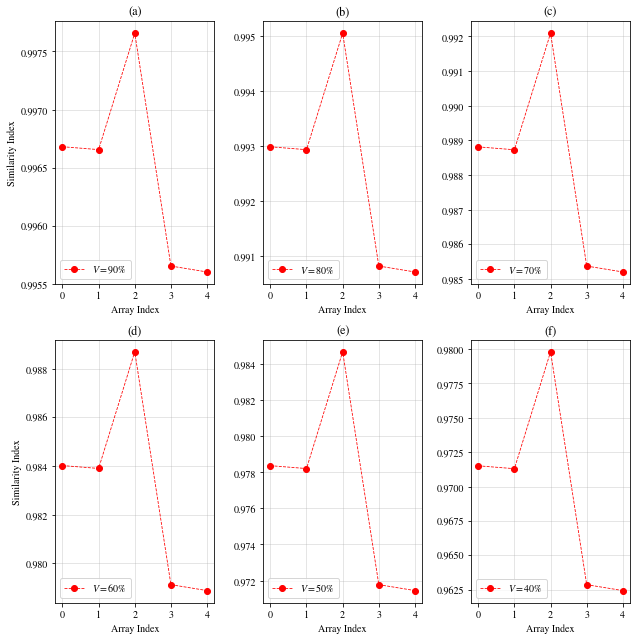

In [58]:
plt.style.use("seaborn-dark-palette")

rcParams['font.family'] = 'sans-serif'
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
#plt.figure(figsize=(9,9))
f = plt.figure(figsize=(10,10))
f.set_figheight(9)
f.set_figwidth(9)


plt.subplot(2,3,1)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.9, x0=180), 'o--', color="red", label="$V = 90\%$", linewidth=0.8)
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.ylabel("Similarity Index")
plt.title("(a)")
#plt.ylim((0.965, 0.9985))

plt.subplot(2,3,2)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.8, x0=180), 'o--', color="red", label = "$V = 80\%$", linewidth=0.8)
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.title("(b)")
#plt.ylim((0.96, 0.9980))

plt.subplot(2,3,3)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.7, x0=180), 'o--', color="red", label="$V = 70\%$", linewidth=0.8)
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.title("(c)")
#plt.ylim((0.96, 0.9980))

plt.subplot(2,3,4)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.6, x0=180), 'o--', color="red", label="$V = 60\%$", linewidth=0.8)
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.ylabel("Similarity Index")
plt.title("(d)")
#plt.ylim((0.96, 0.9980))

plt.subplot(2,3,5)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.5, x0=180), 'o--', color="red", label="$V = 50\%$", linewidth=0.8)
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.title("(e)")
#plt.ylim((0.960, 0.9980))

plt.subplot(2,3,6)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.4, x0=180), 'o--', color="red", label="$V = 40\%$", linewidth=0.8)
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.title("(f)")
#plt.ylim((0.96, 0.9980))

plt.tight_layout()
plt.savefig("Varaition_thresh_2.png", dpi=300)

Varaition X_0 equality


In [70]:
avg_val

[200.35625, 200.51300000000003, 194.24375, 206.88875, 207.21725000000004]

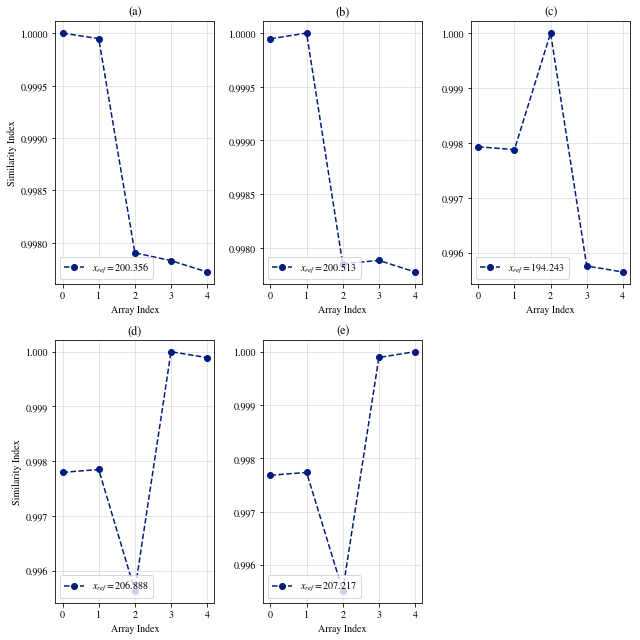

In [71]:
plt.style.use("seaborn-dark-palette")

rcParams['font.family'] = 'sans-serif'
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
#plt.figure(figsize=(9,9))
f = plt.figure(figsize=(10,10))
f.set_figheight(9)
f.set_figwidth(9)


plt.subplot(2,3,1)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.8, x0=avg_val[0]), 'o--',  label="$x_{ref} = 200.356$")
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.ylabel("Similarity Index")
plt.title("(a)")

plt.subplot(2,3,2)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.8, x0=avg_val[1]), 'o--', label = "$x_{ref} = 200.513$")
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.title("(b)")

plt.subplot(2,3,3)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.8, x0=avg_val[2]), 'o--',  label="$x_{ref} = 194.243$")
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.title("(c)")

plt.subplot(2,3,4)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.8, x0=avg_val[3]), 'o--',  label="$x_{ref} = 206.888$")
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.ylabel("Similarity Index")
plt.title("(d)")

plt.subplot(2,3,5)
plt.plot(x, index_val(avg_val, 1.1, 537.2, 0.8, x0=avg_val[4]), 'o--',  label="$x_{ref} = 207.217$")
plt.grid(True, alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("Array Index")
plt.title("(e)")



plt.tight_layout()
plt.savefig("Varaition_x0_eq.png", dpi=300)

Threshold Sim

In [85]:
print(index_val(avg_val, 1.1, 537.2, 0.8, x0=180))
print(index_val(avg_val, 1.1, 537.2, 0.7, x0=180))
print(index_val(avg_val, 1.1, 537.2, 0.6, x0=180))
print(index_val(avg_val, 1.1, 537.2, 0.5, x0=180))
print(index_val(avg_val, 1.1, 537.2, 0.4, x0=180))

[0.9929851874715689, 0.992932826689506, 0.9950462062055834, 0.9908234510596685, 0.9907158330541422]
[0.9888110074290424, 0.9887276665540476, 0.9920935492762206, 0.9853724327628629, 0.985201366953295]
[0.9840140858045638, 0.983895307193944, 0.9886958507652753, 0.9791169757979536, 0.9788735418355412]
[0.9783705613450271, 0.9782103166231597, 0.9846922437038514, 0.9717695813495679, 0.9714417553420238]
[0.971507475273856, 0.9712971347814706, 0.9798142813775811, 0.9628520902275881, 0.9624227279072514]
